In [1]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
path1 = []
path2 = []
path3 = []
path4 = []
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))

In [3]:
path1 = path1[0:100]
path2 = path2[0:100]
path3 = path3[0:100]
path4 = path4[0:100]

In [4]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [5]:
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())   

In [6]:
data = np.array(data)
data.shape

(400, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape((400,4))
result.shape

(400, 4)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.15,shuffle = True,random_state=42)

In [9]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [10]:
y_train.shape

(340, 4)

In [11]:
x_train.shape

(340, 128, 128, 3)

In [12]:
history = model.fit(x_train,y_train,epochs = 10,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
34/34 [==============================] - 26s 704ms/step - loss: 19.1488 - accuracy: 0.4088 - val_loss: 23.8827 - val_accuracy: 0.3500
Epoch 2/10
34/34 [==============================] - 24s 705ms/step - loss: 5.5018 - accuracy: 0.5559 - val_loss: 9.3330 - val_accuracy: 0.3833
Epoch 3/10
34/34 [==============================] - 23s 689ms/step - loss: 2.5243 - accuracy: 0.6676 - val_loss: 3.6672 - val_accuracy: 0.5167
Epoch 4/10
34/34 [==============================] - 24s 702ms/step - loss: 1.2290 - accuracy: 0.7382 - val_loss: 0.8657 - val_accuracy: 0.6333
Epoch 5/10
34/34 [==============================] - 23s 677ms/step - loss: 0.6919 - accuracy: 0.7882 - val_loss: 0.7869 - val_accuracy: 0.6500
Epoch 6/10
34/34 [==============================] - 23s 689ms/step - loss: 0.5235 - accuracy: 0.8265 - val_loss: 0.9385 - val_accuracy: 0.6000
Epoch 7/10
34/34 [==============================] - 23s 686ms/step - loss: 0.3982 - accuracy: 0.8559 - val_loss: 0.9721 - val_accuracy: 0.63

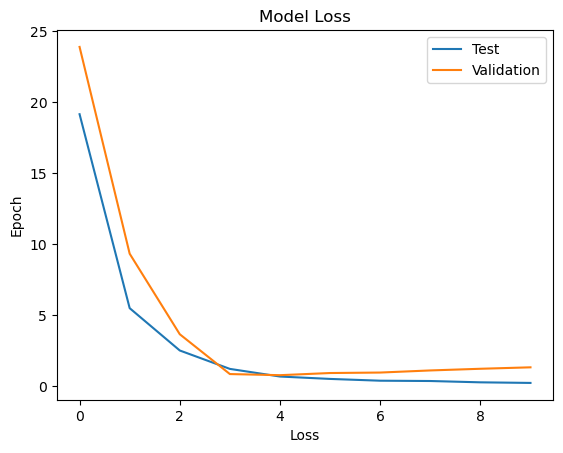

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [14]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'
# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia 

99.99901056289673% Confidence This Is Moderate Dementia


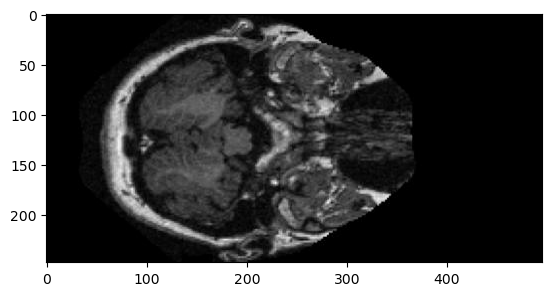

In [15]:
from matplotlib.pyplot import imshow
img = Image.open(r'/kaggle/input/imagesoasis/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_101.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

68.70642304420471% Confidence This Is Very Mild Dementia


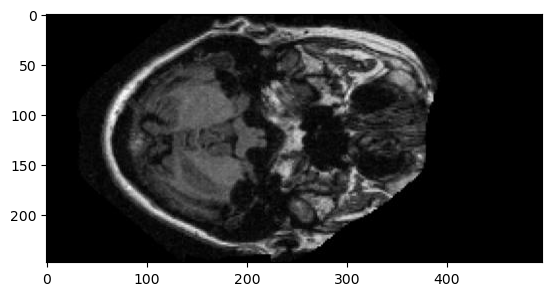

In [16]:
img = Image.open(r'/kaggle/input/imagesoasis/Data/Very mild Dementia/OAS1_0003_MR1_mpr-1_117.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

51.74878239631653% Confidence This Is Mild Dementia


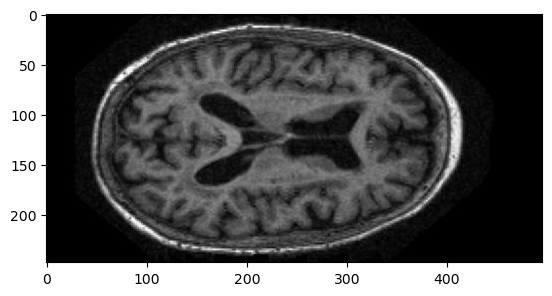

In [17]:
img = Image.open(r'/kaggle/input/imagesoasis/Data/Mild Dementia/OAS1_0028_MR1_mpr-1_145.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))